### Практическое задание по теме "Системы линейных алгебраических уравнений".

#### Задание 1.  
*Решите линейную систему:*  
<br>
<img src="https://latex.codecogs.com/gif.latex?\begin{bmatrix}&space;1&space;&&space;2&space;&&space;3\\&space;4&space;&&space;0&space;&&space;6\\&space;7&space;&&space;8&space;&&space;9&space;\end{bmatrix}&space;\cdot&space;X&space;=&space;\begin{bmatrix}12\\2\\1&space;\end{bmatrix}" title="\begin{bmatrix} 1 & 2 & 3\\ 4 & 0 & 6\\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix}12\\2\\1 \end{bmatrix}" />

In [1]:
import numpy as np

In [2]:
A = np.array([[1, 2, 3],
              [4, 0, 6],
              [7, 8, 9]])
B = np.array([12, 2, 1])

Ответ:

In [3]:
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### Задание 2.  
*Найдите псевдорешение:  
x + 2y - z = 1  
3x - 4y = 7  
8x - 5y + 2z = 12  
2x - 5z = 7  
11x + 4y - 7z = 15*

In [4]:
A = np.array([[1, 2, -1], 
              [3, -4, 0],
              [8, -5, 2],
              [2, 0, -5],
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])

Ответ:

In [5]:
np.linalg.lstsq(A, B, rcond=None)[0]

array([ 1.13919353, -0.90498444, -0.9009803 ])

#### Задание 3.  
*Сколько решений имеет линейная система:*  
<br>
<img src="https://latex.codecogs.com/gif.latex?\begin{bmatrix}&space;1&space;&&space;2&space;&&space;3\\&space;4&space;&&space;5&space;&&space;6\\&space;7&space;&&space;8&space;&&space;9&space;\end{bmatrix}&space;\cdot&space;X&space;=&space;\begin{bmatrix}12\\2\\1&space;\end{bmatrix}" title="\begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix}12\\2\\1 \end{bmatrix}" />  
<br>
*Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.*

In [6]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([[12, 2, 1]])

Обозначим расширенную матрицу С:

In [7]:
C = np.concatenate((A, B.T), axis=1)
C

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

Вычислим ранги исходной и расширенной матриц:

In [8]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

(2, 3)

Так как ранг расширенной матрицы больше, чем ранг исходной матрицы,  
то линейная система не имеет точных решений.  
Данная система не будет иметь единственного решения даже при  
изменении вектора правой части, т.к. ранг исходной матрицы  
останется равным 2, а это меньше числа неизвестных.  
Но мы можем сделать так, чтобы система стала иметь  
бесконечное множество решений. Для этого изменим вектор  
правой части. Например, так:

In [9]:
B = np.array([[1, 2, 3]])

Теперь снова посчитаем ранги матриц:

In [10]:
C = np.concatenate((A, B.T), axis=1)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

(2, 2)

Теперь система совместна, из множества решений найдём одно,  
ближайшее к нулевому вектору:

In [11]:
B = B[0]
np.linalg.lstsq(A, B, rcond=None)[0]

array([-0.05555556,  0.11111111,  0.27777778])

#### Задание 4.  
*Вычислите LU-разложение матрицы:*  
<br>
<img src="https://latex.codecogs.com/gif.latex?\begin{bmatrix}&space;1&space;&&space;2&space;&&space;3\\&space;2&space;&&space;16&space;&&space;21\\&space;4&space;&&space;28&space;&&space;73&space;\end{bmatrix}" title="\begin{bmatrix} 1 & 2 & 3\\ 2 & 16 & 21\\ 4 & 28 & 73 \end{bmatrix}" />

In [12]:
from scipy.linalg import lu

In [13]:
A = np.array([[1, 2, 3],
              [2, 16, 21],
              [4, 28, 73]])

In [14]:
L, U = lu(A, permute_l=True)

print(L)
print(U)

[[ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]
 [ 1.    0.    0.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


Проверим правильность разложения:

In [15]:
np.all(A == np.dot(L, U))

True

Тогда итоговое разложение будет иметь вид:  
<br>
<img src="https://latex.codecogs.com/gif.latex?\begin{bmatrix}&space;1&space;&&space;2&space;&&space;3\\&space;2&space;&&space;16&space;&&space;21\\&space;4&space;&&space;28&space;&&space;73&space;\end{bmatrix}&space;=&space;\begin{bmatrix}&space;0,25&space;&&space;1&space;&&space;0\\&space;0,5&space;&&space;-0,4&space;&&space;1\\&space;1&space;&&space;0&space;&&space;0&space;\end{bmatrix}&space;\cdot&space;\begin{bmatrix}&space;4&space;&&space;28&space;&&space;73\\&space;0&space;&&space;-5&space;&&space;-15,25\\&space;0&space;&&space;0&space;&&space;-21,6&space;\end{bmatrix}" title="\begin{bmatrix} 1 & 2 & 3\\ 2 & 16 & 21\\ 4 & 28 & 73 \end{bmatrix} = \begin{bmatrix} 0,25 & 1 & 0\\ 0,5 & -0,4 & 1\\ 1 & 0 & 0 \end{bmatrix} \cdot \begin{bmatrix} 4 & 28 & 73\\ 0 & -5 & -15,25\\ 0 & 0 & -21,6 \end{bmatrix}" />

#### Задание 5.  
*Найдите нормальное псевдорешение недоопределенной системы:  
x + 2y - z = 1  
8x - 5y + 2z = 12  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.* 

Решением этой системы является прямая, по которой  
пересекаются две заданные плоскости. Для того,  
чтобы найти её уравнение, выразим z из первого  
уравнения и подставим во второе.

z = x + 2y - 1

8x - 5y + 2(x + 2y - 1) = 12  
8x - 5y + 2x + 4y - 2 = 12  
10x - y - 2 = 12  
y = 10x - 14

Определим функцию для нормы решения:  

In [16]:
def Q(x, y):
    return x**2 + y**2

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

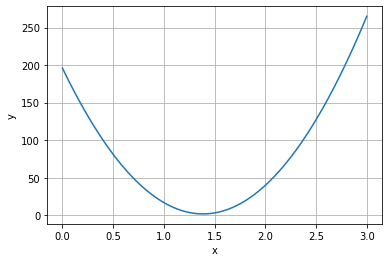

In [18]:
x = np.linspace(0, 3, 200)
y = 10*x - 14

plt.plot(x, Q(x, y))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

Из графика видно, что ближайшее к нулевому вектору  
решение будет при значении *х*, примерно равному 1.4.  
Теперь найдём это решение численным методом:

In [19]:
A = np.array([[1, 2, -1],
              [8, -5, 2]])
B = np.array([1, 12])

In [20]:
np.linalg.lstsq(A, B, rcond=None)[0]

array([ 1.38191882, -0.18081181,  0.0202952 ])

Это и есть искомое нормальное псевдорешение.

#### Задание 6.  
*Найдите одно из псевдорешений вырожденной системы:*  
<br>
<img src="https://latex.codecogs.com/gif.latex?\begin{bmatrix}&space;1&space;&&space;2&space;&&space;3\\&space;4&space;&&space;5&space;&&space;6\\&space;7&space;&&space;8&space;&&space;9&space;\end{bmatrix}&space;\cdot&space;X&space;=&space;\begin{bmatrix}2\\5\\11&space;\end{bmatrix}" title="\begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix}2\\5\\11 \end{bmatrix}" />  
<br>
*Попробуйте также отыскать и нормальное псевдорешение.*

In [21]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
B = np.array([2, 5, 11])

In [22]:
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


In [23]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [24]:
B1 = np.dot(Q.T, B)[:2]
B1

array([-1.21860576e+01,  3.55271368e-15])

In [25]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 3.92767275e-15])

Одно из псевдорешений имеет вид:

In [26]:
X = np.append(X1, 0)
print(X)

[1.50000000e+00 3.92767275e-15 0.00000000e+00]


Его норма:

In [27]:
np.linalg.norm(X)

1.499999999999996

Нормальное псевдорешение будет иметь вид:

In [28]:
X = np.linalg.lstsq(A, B, rcond=None)[0]
X

array([ 1.25,  0.5 , -0.25])

Его норма:

In [29]:
np.linalg.norm(X)

1.3693063937629126